# Analysis of Results

## Time Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# --- Provided Data ---
NUM_READS = 50
instance_sizes_full = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
simulated_times = [0.28, 2.03, 6.71, 15.68, 31.03, 54.88, 89.53, 130.13, 188.7, 270.51, 389.86, 497.0, 670.29, 851.74, 1095.64]
feasible_solutions = [50, 50, 50, 50, 50, 50, 41, 47, 21, 49, 26, 24, 24, 21, 26]
best_water_costs    = [75, 120.0, 147.0, 201.0, 210.0, 264.0, 309.0, 327.0, 381.0, 408.0, 453.0, 507.0, 525.0, 579.0, 579.0]
optimal_water_costs = [75, 120, 147.0, 192.0, 210.0, 264.0, 300.0, 327.0, 372.0, 390.0, 435.0, 489.0, 507.0, 552.0, 579.0]

# Safety
instance_sizes = instance_sizes_full[:len(simulated_times)]
normalized_simulated_times = [t / NUM_READS for t in simulated_times]

In [3]:
# --- Theoretical Time Calculation ---
# Big O model: T(n) = C * (2^n * n^2)
# Calibrate C using the normalized simulated time for the smallest instance size.
n0 = instance_sizes[0]
C = normalized_simulated_times[0] / ((2 ** n0) * (n0 ** 2))
print("Constant scaling factor C:", C)

# Compute theoretical times per run for each instance size.
theoretical_times = [C * ((2 ** n) * (n ** 2)) for n in instance_sizes]
print("Theoretical times (normalized per run):", theoretical_times)

Constant scaling factor C: 0.00035000000000000005
Theoretical times (normalized per run): [0.005600000000000001, 0.08960000000000001, 0.8064000000000001, 5.734400000000001, 35.84, 206.43840000000003, 1123.9424000000001, 5872.025600000001, 29727.129600000004, 146800.64, 710515.0976000001, 3382286.7456000005, 15877957.222400002, 73658689.12640001, 338228674.56000006]


<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_15625/3639167744.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Time Analysis: Normalized Simulated vs. Theoretical (Scaled as $2^n \cdot n^2$)')


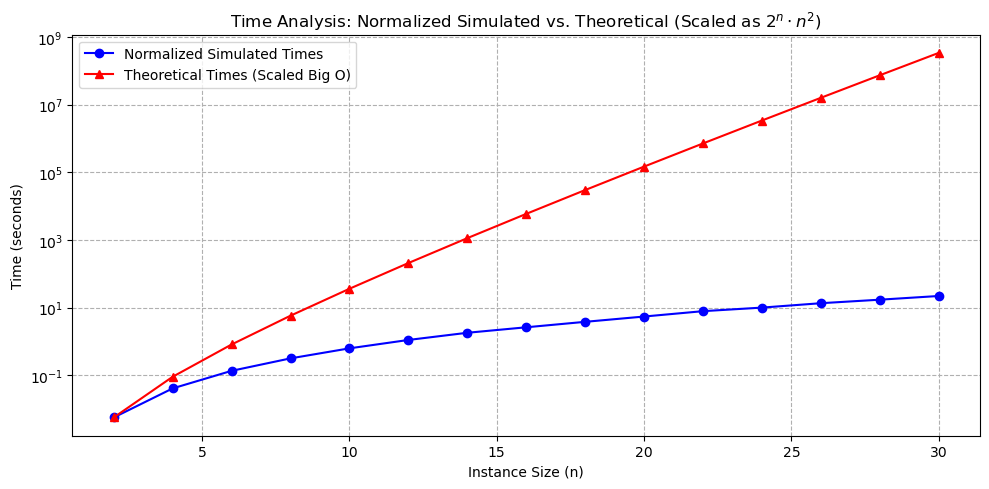

In [4]:
# --- Plot Time Analysis on a Log Scale ---
plt.figure(figsize=(10, 5))
plt.plot(instance_sizes, normalized_simulated_times, 'bo-', label='Normalized Simulated Times')
plt.plot(instance_sizes, theoretical_times, 'r^-', label='Theoretical Times (Scaled Big O)')

plt.xlabel('Instance Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Time Analysis: Normalized Simulated vs. Theoretical (Scaled as $2^n \cdot n^2$)')
plt.yscale('log')  # Set y-axis to logarithmic scale for better visualization
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

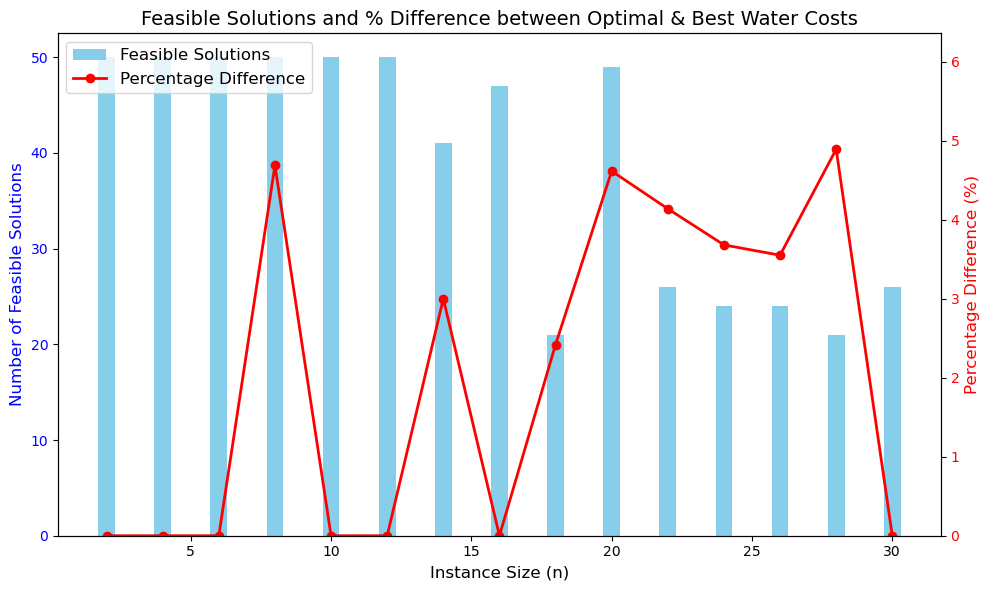

In [5]:
percent_diff = [
    abs(optimal_water_costs[i] - best_water_costs[i]) / optimal_water_costs[i] * 100
    for i in range(len(best_water_costs))
]

# Create a dual-axis plot.
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of feasible solutions as a bar chart on the left y-axis.
bar_width = 0.6
bars = ax1.bar(instance_sizes, feasible_solutions, width=bar_width, 
               color='skyblue', label='Feasible Solutions')
ax1.set_xlabel('Instance Size (n)', fontsize=12)
ax1.set_ylabel('Number of Feasible Solutions', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis for the percentage difference.
ax2 = ax1.twinx()
ax2.plot(instance_sizes, percent_diff, 'r-o', linewidth=2, label='Percentage Difference')
ax2.set_ylabel('Percentage Difference (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
# Optionally, set a suitable y-limit for percentage difference
ax2.set_ylim(0, max(percent_diff)*1.3)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=12)

plt.title('Feasible Solutions and % Difference between Optimal & Best Water Costs', fontsize=14)
plt.tight_layout()
plt.show()